# **Modelling**

## Objectives

+ Finding what are important for user when buying house through Regression, which going to shows both important and least important features
+ Use regressor result for the random forest and hyper parameter
+ Use result from random forest and hyper parameter to see best modal


## Inputs

+ /workspace/Project_05/outputs/datasets/cleaned/TestSplitResult.csv
+ /workspace/Project_05/outputs/datasets/cleaned/TrainSplitResult.csv


## Outputs

+ Determine the n_estimator, min_splits, and max_depth value
+ Summarize the finding of what is the best and the important for house prediction

## Additional Comments

+ By de-engineering the model, we are abble to learn the feature affecting the price and help user with determined which features should be invest on.


---

# Change working directory

In [14]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Project_05'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [15]:

os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [16]:
current_dir = os.getcwd()
current_dir

'/workspace'

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ARDRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Load clean data 

In [25]:
df_train = pd.read_csv(f"/workspace/Project_05/outputs/datasets/cleaned/TrainSplitResult.csv")
df_test = pd.read_csv(f"/workspace/Project_05/outputs/datasets/cleaned/TestSplitResult.csv")
df_train.head()

,Unnamed: 0,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Unf,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SalePrice
0,135,1682,0.0,3.0,0,1304,25.330882,530,1970.0,1682,...,0,0,1,0,0,1,0,0,1,174000
1,1452,1072,0.0,2.0,547,0,25.330882,525,2005.0,1072,...,1,0,0,1,0,0,0,0,1,145000
2,762,764,783.0,3.0,24,732,25.330882,614,2009.0,1547,...,1,0,0,0,0,1,0,1,0,215200
3,932,0,0.0,3.0,0,1905,0.000000,788,2006.0,1905,...,0,0,1,1,0,0,1,0,0,320000
4,435,827,834.0,3.0,385,70,25.330882,550,1996.0,1661,...,1,0,0,0,1,0,0,1,0,212000


In [26]:
feature = ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF',
       'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea',
       'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd',
      'BsmtExposure_No', 'BsmtExposure_Yes',
       'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ',
       'BsmtFinType1_Unf', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA']
target = ["SalePrice"]

In [27]:
X_train = df_train[feature]
y_train = df_train[target]

In [28]:
X_test = df_test[feature]
y_test = df_test[target]

## Standardization

In [30]:
std_scaler = StandardScaler().fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

## Linear Regression

In [32]:
reg = LinearRegression().fit(X_train,y_train)

In [33]:
score_reg_tr = reg.score(X_train,y_train)
score_reg_ts = reg.score(X_test,y_test)

## ARDRegression

+ Robust linear regression that uses regularisation

In [34]:
ard = ARDRegression().fit(X_train,y_train)

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [35]:
score_ard_tr = ard.score(X_train,y_train)
score_ard_ts = ard.score(X_test,y_test)

## KNN Regressor


+ Using clustering technique will allow for non-linear regression

In [36]:
kn = KNeighborsRegressor().fit(X_train,y_train)

In [37]:
score_kn_tr = kn.score(X_train,y_train)
score_kn_ts = kn.score(X_test,y_test)

## Random forest

+ Using decision tree to allow for non-linearity

In [38]:
rf = RandomForestRegressor().fit(X_train,y_train)

/tmp/ipykernel_981/3647548829.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor().fit(X_train,y_train)


In [39]:
score_rf_tr = rf.score(X_train,y_train)
score_rf_ts = rf.score(X_test,y_test)


<AxesSubplot:>

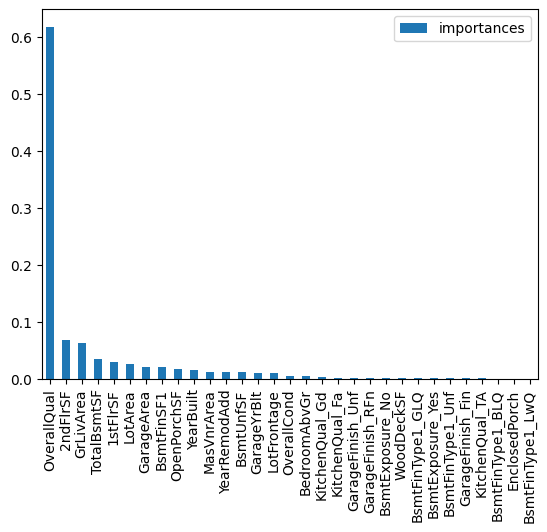

In [40]:
importances = rf.feature_importances_
dict_importances = {"importances":importances}
pd.DataFrame(dict_importances, index=feature)\
        .sort_values(by = "importances",ascending = False)\
        .plot(kind = "bar", title='')

**Observation**
+ Overall quality dominatly important
 + 2ndFlrSF, GrLivArea are the second and third most important feature
+ BsmtFinType1_BLQ, BsmtFinType1_LWQ, and EnclosedPrch are three least important features

### Hyper parameter tuning

/tmp/ipykernel_981/1283715959.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators= e ).fit(X_train,y_train)
/tmp/ipykernel_981/1283715959.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators= e ).fit(X_train,y_train)
/tmp/ipykernel_981/1283715959.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators= e ).fit(X_train,y_train)
/tmp/ipykernel_981/1283715959.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_e

Text(0.5, 1.0, 'Random Forest Hyper parameter tuning\n best test score 0.86\nbest parameter 75')

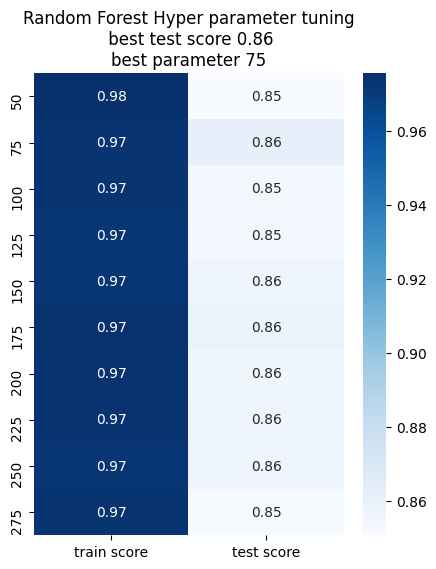

In [41]:
estimators = np.arange(50, 300, 25)
test_scores = []
train_scores = []

for e in estimators:
  rf = RandomForestRegressor(n_estimators= e ).fit(X_train,y_train)
  train_scores.append(rf.score(X_train,y_train))
  test_scores.append(rf.score(X_test,y_test))

df_scores = pd.DataFrame({"train score": train_scores, "test score": test_scores}, index = estimators)
plt.figure(figsize = (5,6))
sns.heatmap(df_scores, annot=True, cmap="Blues" )
plt.title(f"Random Forest Hyper parameter tuning\n best test score {test_scores[np.argmax(test_scores)]:.2f}\nbest parameter {estimators[np.argmax(test_scores)]}")

/tmp/ipykernel_981/1280212158.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators= 75, min_samples_split= e ).fit(X_train,y_train)
/tmp/ipykernel_981/1280212158.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators= 75, min_samples_split= e ).fit(X_train,y_train)
/tmp/ipykernel_981/1280212158.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators= 75, min_samples_split= e ).fit(X_train,y_train)
/tmp/ipykernel_981/1280212158.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

Text(0.5, 1.0, 'Random Forest Hyper parameter tuning\n best test score 0.86\nbest parameter 6')

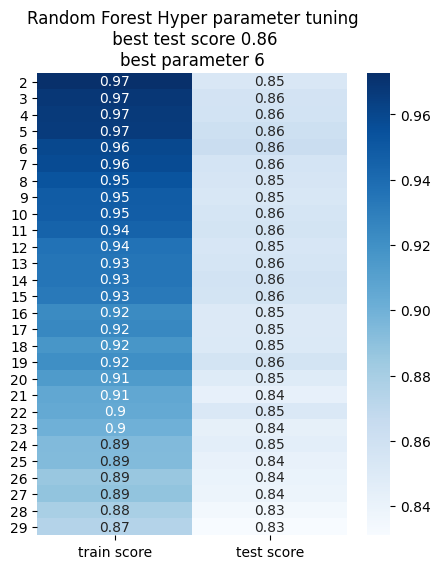

In [42]:
minsplits = np.arange(2, 30, 1)
test_scores = []
train_scores = []

for e in minsplits:
  rf = RandomForestRegressor(n_estimators= 75, min_samples_split= e ).fit(X_train,y_train)
  train_scores.append(rf.score(X_train,y_train))
  test_scores.append(rf.score(X_test,y_test))

df_scores = pd.DataFrame({"train score": train_scores, "test score": test_scores}, index = minsplits)
plt.figure(figsize = (5,6))
sns.heatmap(df_scores, annot=True, cmap="Blues" )
plt.title(f"Random Forest Hyper parameter tuning\n best test score {test_scores[np.argmax(test_scores)]:.2f}\nbest parameter {minsplits[np.argmax(test_scores)]}")

/tmp/ipykernel_981/1506043329.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators= 75, min_samples_split= 6,max_depth = e ).fit(X_train,y_train)
/tmp/ipykernel_981/1506043329.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators= 75, min_samples_split= 6,max_depth = e ).fit(X_train,y_train)
/tmp/ipykernel_981/1506043329.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators= 75, min_samples_split= 6,max_depth = e ).fit(X_train,y_train)
/tmp/ipykernel_981/1506043329.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expe

Text(0.5, 1.0, 'Random Forest Hyper parameter tuning\n best test score 0.86\nbest parameter 17')

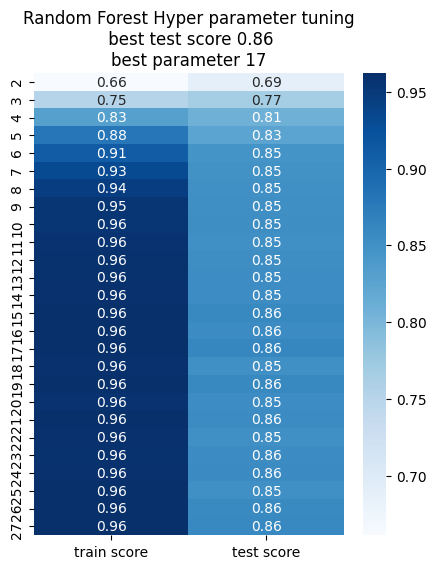

In [43]:
maxdepths = np.arange(2, 28, 1)
test_scores = []
train_scores = []

for e in maxdepths:
  rf = RandomForestRegressor(n_estimators= 75, min_samples_split= 6,max_depth = e ).fit(X_train,y_train)
  train_scores.append(rf.score(X_train,y_train))
  test_scores.append(rf.score(X_test,y_test))

df_scores = pd.DataFrame({"train score": train_scores, "test score": test_scores}, index = maxdepths)
plt.figure(figsize = (5,6))
sns.heatmap(df_scores, annot=True, cmap="Blues" )
plt.title(f"Random Forest Hyper parameter tuning\n best test score {test_scores[np.argmax(test_scores)]:.2f}\nbest parameter {maxdepths[np.argmax(test_scores)]}")

In [44]:
rf = RandomForestRegressor(n_estimators= 75, min_samples_split= 6,max_depth = 17 ).fit(X_train,y_train)
score_rf_tr = rf.score(X_train,y_train)
score_rf_ts = rf.score(X_test,y_test)

/tmp/ipykernel_981/3933645840.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators= 75, min_samples_split= 6,max_depth = 17 ).fit(X_train,y_train)


**Observation**
+ n_estimators - best parameter is 75
+ min_samples_splits - best parameter is 6
+ max_depth - best parameter  is 17

## Gradient Boosting

In [45]:
gb = GradientBoostingRegressor().fit(X_train,y_train)

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [46]:
score_gb_tr = gb.score(X_train,y_train)
score_gb_ts = gb.score(X_test,y_test)

<AxesSubplot:title={'center':'Gradient Boosting '}>

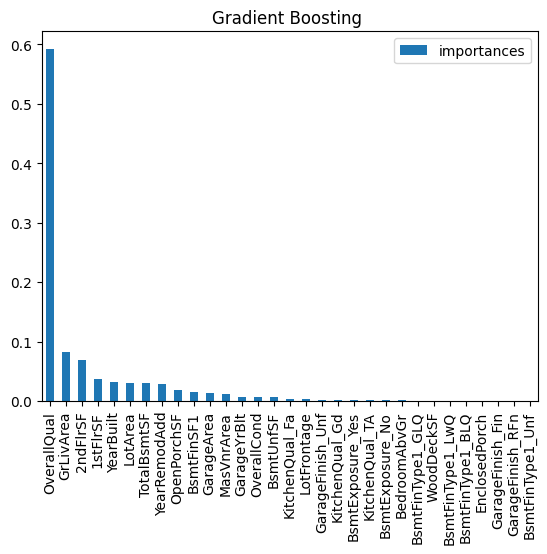

In [47]:
importances = gb.feature_importances_
dict_importances = {"importances":importances}
pd.DataFrame(dict_importances, index=feature)\
        .sort_values(by = "importances",ascending = False)\
        .plot(kind = "bar", title='Gradient Boosting ')

**Observation**
+ OverallQual, GrLivArea, and 2ndFlrSF are the most important features
+ GarageFinish_Fin, GarageFinish_RFn, BsmtFinType1_Unf are the least important features

### Hyper parameter tuning

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

Text(0.5, 1.0, 'Random Forest Hyper parameter tuning\n best test score 0.87\nbest parameter 250')

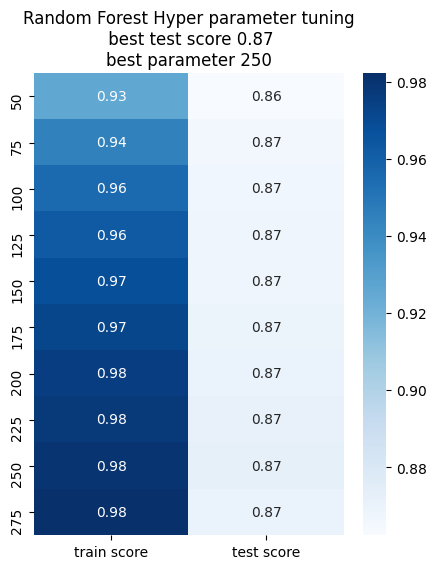

In [48]:
estimators = np.arange(50, 300, 25)
test_scores = []
train_scores = []

for e in estimators:
  gb = GradientBoostingRegressor(n_estimators= e ).fit(X_train,y_train)
  train_scores.append(gb.score(X_train,y_train))
  test_scores.append(gb.score(X_test,y_test))

df_scores = pd.DataFrame({"train score": train_scores, "test score": test_scores}, index = estimators)
plt.figure(figsize = (5,6))
sns.heatmap(df_scores, annot=True, cmap="Blues" )
plt.title(f"Random Forest Hyper parameter tuning\n best test score {test_scores[np.argmax(test_scores)]:.2f}\nbest parameter {estimators[np.argmax(test_scores)]}")

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

Text(0.5, 1.0, 'Random Forest Hyper parameter tuning\n best test score 0.88\nbest parameter 5')

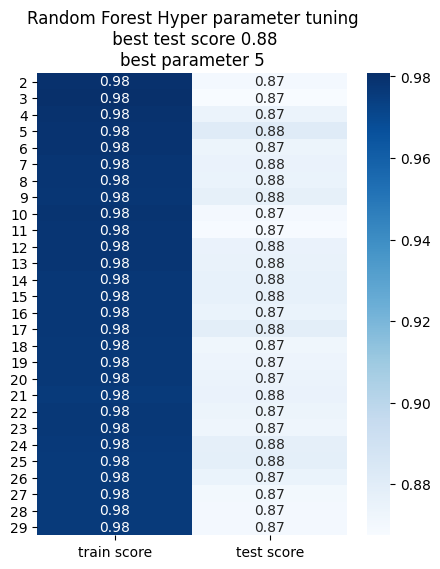

In [49]:
minsplits = np.arange(2, 30, 1)
test_scores = []
train_scores = []

for e in minsplits:
  gb = GradientBoostingRegressor(n_estimators= 250, min_samples_split= e ).fit(X_train,y_train)
  train_scores.append(gb.score(X_train,y_train))
  test_scores.append(gb.score(X_test,y_test))

df_scores = pd.DataFrame({"train score": train_scores, "test score": test_scores}, index = minsplits)
plt.figure(figsize = (5,6))
sns.heatmap(df_scores, annot=True, cmap="Blues" )
plt.title(f"Random Forest Hyper parameter tuning\n best test score {test_scores[np.argmax(test_scores)]:.2f}\nbest parameter {minsplits[np.argmax(test_scores)]}")

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

Text(0.5, 1.0, 'Random Forest Hyper parameter tuning\n best test score 0.88\nbest parameter 3')

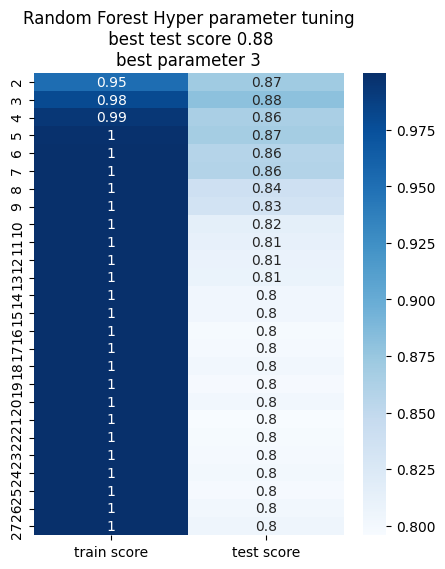

In [50]:
maxdepths = np.arange(2, 28, 1)
test_scores = []
train_scores = []

for e in maxdepths:
  gb = GradientBoostingRegressor(n_estimators= 250, min_samples_split= 5,max_depth = e ).fit(X_train,y_train)
  train_scores.append(gb.score(X_train,y_train))
  test_scores.append(gb.score(X_test,y_test))

df_scores = pd.DataFrame({"train score": train_scores, "test score": test_scores}, index = maxdepths)
plt.figure(figsize = (5,6))
sns.heatmap(df_scores, annot=True, cmap="Blues" )
plt.title(f"Random Forest Hyper parameter tuning\n best test score {test_scores[np.argmax(test_scores)]:.2f}\nbest parameter {maxdepths[np.argmax(test_scores)]}")

In [51]:
gb = GradientBoostingRegressor(n_estimators= 250, min_samples_split= 5,max_depth = 3 ).fit(X_train,y_train)
score_gb_tr = gb.score(X_train,y_train)
score_gb_ts = gb.score(X_test,y_test)

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


**Observation**
+ n_estimators - best parameter is 250
+ min_samples_splits - best parameter is 5
+ max_depth - best parameter  is 3

# Summary

In [52]:
train_score = [score_reg_tr,score_ard_tr,score_kn_tr,score_rf_tr,score_gb_tr]
test_score = [score_reg_ts,score_ard_ts,score_kn_ts,score_rf_ts,score_gb_ts]
models = ["Linear Regression","ARDRegression","KNN Regressor","Random Forest","Gradient Boosting"]

dict_scores = {"models":models,"train_score":train_score,"test_score":test_score}

pd.DataFrame(dict_scores).sort_values(by = "test_score",ascending = False)

,models,train_score,test_score
4,Gradient Boosting,0.979404,0.880677
3,Random Forest,0.962498,0.859868
0,Linear Regression,0.728259,0.754818
1,ARDRegression,0.726527,0.750754
2,KNN Regressor,0.795907,0.749134


**Observation**
+ the best model was Gradient Boosting with test score of 0.88
 + with hyper parameters
 + still showing significant overfitting and further work need to be done to correct this
+ the baseline model got test score of 0.75
+ the worst performing model was KNN with test score of 0.75
+ linear regression and ARDRegression show no overfitting but potentially underfitting seen by the higher test score 